# Assignment 2

**Aim** : Perform multiple linear regression on insurance dataset and car dataset


In [ ]:
# import libraries
import numpy as np
import pandas as pd

from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [ ]:
# load data
drive.mount('/content/drive',  force_remount=True)
datasets = pd.read_csv('/content/drive/MyDrive/insurance.csv')


Mounted at /content/drive


In [ ]:
datasets

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# encode categorical values to numerical values

datasets['sex'] = datasets['sex'].astype('category')
datasets['sex'] = datasets['sex'].cat.codes

datasets['smoker'] = datasets['smoker'].astype('category')
datasets['smoker'] = datasets['smoker'].cat.codes

datasets['region'] = datasets['region'].astype('category')
datasets['region'] = datasets['region'].cat.codes

In [ ]:
datasets

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [ ]:
datasets.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
# separate features and target data

X = datasets.drop(columns='expenses')

X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [ ]:
y = datasets['expenses']

y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [ ]:
# Split training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

# print("X_train : \n",X_train)
# print("\nX_test : \n", X_test)
# print("\ny_train : \n", y_train)
# print("\ny_test : \n", y_test)

In [ ]:
# Train the model

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predict

y_pred_train = lr.predict(X_train)

y_pred_train

array([ 1.40338492e+04,  4.30290841e+03,  8.64813858e+03,  1.09582420e+04,
        1.04635993e+04,  7.49358496e+03,  1.50002549e+04,  1.19270281e+04,
        1.18032509e+04,  8.52750873e+02,  1.15695484e+04,  5.26834518e+03,
        1.08377439e+03,  3.79026070e+04,  1.44557041e+04,  1.59381313e+03,
        2.85009146e+04,  2.87334450e+04,  1.31046709e+04,  1.13364713e+04,
        1.32105677e+04,  1.53377220e+04,  3.63674713e+04,  3.43952799e+04,
        3.26729052e+04,  3.59031628e+04,  4.24609946e+03,  1.33091880e+04,
        2.74995179e+04,  1.34295798e+04,  1.26030991e+04,  4.27460553e+03,
        1.22959115e+04,  2.51362376e+03,  4.81172932e+03,  9.76242029e+03,
        9.03525137e+03,  3.15700282e+03,  6.94575444e+03,  6.67099660e+03,
        1.20600920e+04,  2.18245170e+03,  3.38923374e+03,  1.35209867e+04,
        6.05773999e+03,  3.91024432e+04,  1.54463798e+04,  8.38961489e+03,
        1.45803770e+04,  1.31124365e+04,  9.34471500e+03,  8.05612948e+03,
        9.06629697e+03,  

In [ ]:
# calculate r2_score

r2_score(y_train,y_pred_train) * 100


75.68976575166774

In [ ]:
# predict

y_pred = lr.predict(X_test)

y_pred

array([11225.88540725,  7406.29296581, 14452.26916225, 31650.52415484,
       33304.22336292,  3007.98215328, 11905.62695148,  9461.96219745,
       14236.00824175,  9928.30224987,  5841.71854462,  8410.60874722,
       -1902.88829795, 32699.09010721,  5210.40039763, 16163.38847314,
       11114.25015021, 13168.14587873,  4348.49759439, 28528.26279356,
       10872.11259609, 28418.8628952 ,  8921.38075061, 13564.30423631,
        6868.64384727, 13857.66151531, 10156.69632724, 15134.56253363,
        3685.80006154, 13405.55806741,  8989.30374424, 27468.85757291,
       32184.64749117, 10645.42920193,  2957.89825449, 36237.68869538,
       10348.7597496 , 29623.40958046, 11320.56814929, 12475.26660648,
       36454.50175506, 36205.4041329 ,  4135.47725984,  6288.87137948,
       31616.82640024, 10682.72813462, 11790.78740197, 37950.22054229,
       37425.76276133,  3224.4594916 ,   520.88184577, 14396.97653726,
       33023.65987978, 12827.59186886, 11223.2285082 ,  6667.21270406,
      

In [ ]:
# calculate r2_score

r2_score(y_test,y_pred) * 100

73.29722264018342

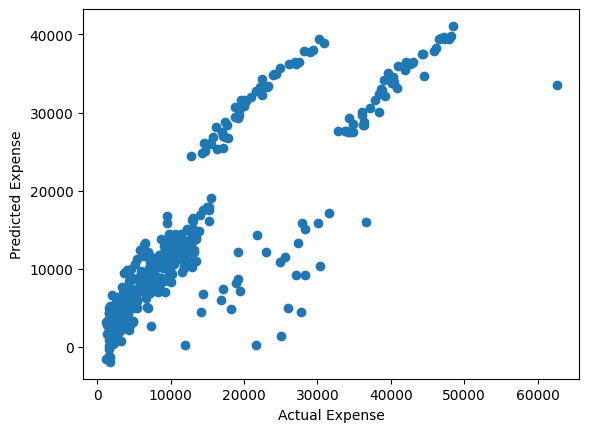

In [ ]:
# plot the scatter

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Expense")
plt.ylabel("Predicted Expense")
plt.show()

In [ ]:
# linear regression on car dataset

# load data
cars = pd.read_csv('/content/drive/MyDrive/car.csv')

cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
# encode categorical values to numerical values

cars['name'] = cars['name'].astype('category')
cars['name'] = cars['name'].cat.codes

cars['fuel'] = cars['fuel'].astype('category')
cars['fuel'] = cars['fuel'].cat.codes

cars['seller_type'] = cars['seller_type'].astype('category')
cars['seller_type'] = cars['seller_type'].cat.codes

cars['transmission'] = cars['transmission'].astype('category')
cars['transmission'] = cars['transmission'].cat.codes

cars['owner'] = cars['owner'].astype('category')
cars['owner'] = cars['owner'].cat.codes

In [ ]:
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2
4336,601,2014,409999,80000,1,1,1,2
4337,777,2009,110000,83000,4,1,1,2
4338,381,2016,865000,90000,1,1,1,0


In [ ]:
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# split data and target

X = cars.drop(columns='owner')
X

,name,year,selling_price,km_driven,fuel,seller_type,transmission
0,775,2007,60000,70000,4,1,1
1,1041,2007,135000,50000,4,1,1
2,505,2012,600000,100000,1,1,1
3,118,2017,250000,46000,4,1,1
4,279,2014,450000,141000,1,1,1
...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1
4336,601,2014,409999,80000,1,1,1
4337,777,2009,110000,83000,4,1,1
4338,381,2016,865000,90000,1,1,1


In [ ]:
y = cars['owner']
y

0       0
1       0
2       0
3       0
4       2
       ..
4335    2
4336    2
4337    2
4338    0
4339    0
Name: owner, Length: 4340, dtype: int8

In [ ]:
# Split training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

# print("X_train : \n",X_train)
# print("\nX_test : \n", X_test)
# print("\ny_train : \n", y_train)
# print("\ny_test : \n", y_test)

In [ ]:
# Train the model

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predict

y_pred_train = lr.predict(X_train)

y_pred_train

array([0.13730936, 0.98973976, 0.31627813, ..., 0.43122273, 0.24745929,
       0.38882304])

In [ ]:
# calculate r2_score

r2_score(y_train,y_pred_train) * 100


20.62202191478071

In [ ]:
# predict

y_pred_test = lr.predict(X_test)

y_pred_test

array([-4.33421644e-02,  1.11734052e+00,  1.47237792e+00,  6.46618325e-01,
        1.01802851e-01,  8.41299031e-02,  9.28512275e-01,  1.47417810e+00,
        7.80239245e-01,  6.38006385e-01,  1.51733520e+00,  1.48384706e+00,
        1.22434192e+00,  1.22686996e-01,  9.48785640e-01,  5.27546232e-01,
        7.87869332e-01,  3.57732464e-01,  1.40098473e+00,  8.25338634e-01,
        4.08262169e-01,  8.91257942e-01,  5.46894881e-01,  4.41854544e-01,
        1.22874870e+00,  4.56057738e-01,  6.98302861e-01,  2.38951111e-01,
        1.03950089e+00, -1.37617526e-01,  1.18939407e+00,  6.12897713e-01,
        4.48995853e-01,  5.89467601e-01,  9.39349970e-01,  4.60293191e-01,
        2.22311744e+00,  1.01009740e+00,  6.47529738e-01,  6.97255608e-01,
        1.65007525e+00,  1.52243092e+00,  1.17731513e+00,  6.43042274e-01,
        1.34518541e+00,  1.68374386e+00,  1.36311466e+00,  9.48069215e-01,
        1.12282410e+00, -1.97991783e-01,  3.83601685e-01,  1.24166099e+00,
        4.89749697e-01,  

In [ ]:
# calculate r2_score

r2_score(y_test,y_pred_test) * 100


20.119025913678122

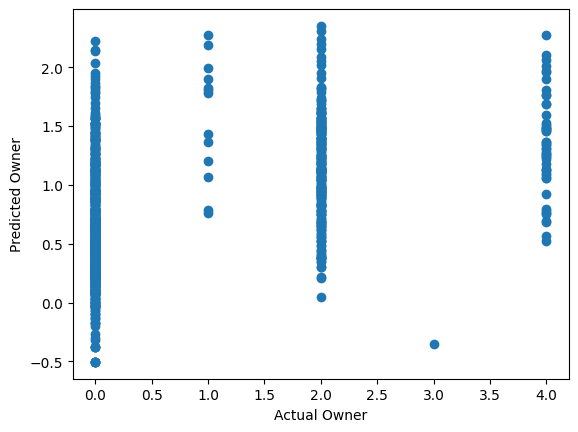

In [ ]:
# plot the scatter

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Owner")
plt.ylabel("Predicted Owner")
plt.show()